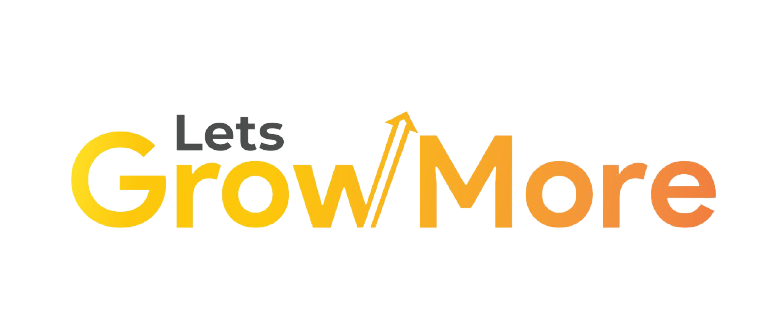

# Introduction:
## Problem Statement:
To execute stock market prediction and forecasting using Stacked LSTM(Long Stort-Term Memory).
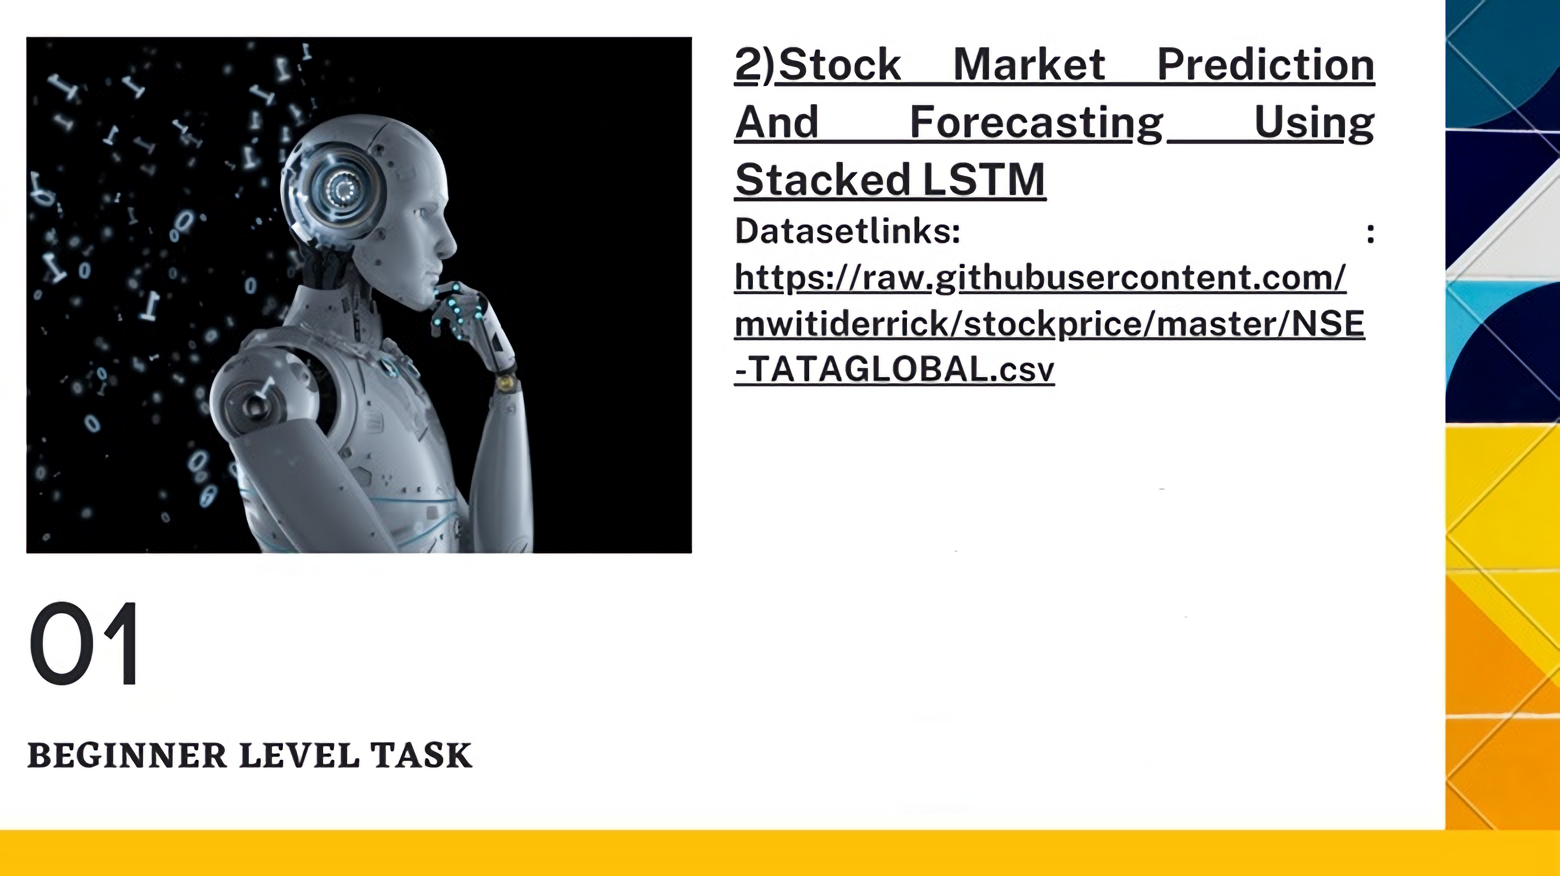

-----------
<p style = "font-size:16px"><b>BY: Lakshmi Sindhu.P</b></p>

-------
*Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.*

*This is a behavior required in complex problem domains like machine translation, speech recognition, and more.*

*LSTMs are a complex area of deep learning. It can be hard to get your hands around what LSTMs are, and how terms like bidirectional and sequence-to-sequence relate to the field.*

*The Stacked LSTM is an extension to this model that has multiple hidden LSTM layers where each layer contains multiple memory cells.*

---------------------
## What are Stocks?
***Stocks, or shares of a company, represent ownership equity in the firm, which give shareholders voting rights as well as a residual claim on corporate earnings in the form of capital gains and dividends.***

-------------
## Stock Market:
***Stock markets are where individual and institutional investors come together to buy and sell shares in a public venue. Nowadays these exchanges exist as electronic marketplaces.***

--------------
## Share Prices:
***Share prices are set by supply and demand in the market as buyers and sellers place orders. Order flow and bid-ask spreads are often maintained by specialists or market makers to ensure an orderly and fair market.***

-----------
## Technical Analysis:
***Technical analysis focuses on analyzing the direction of prices to predict future prices.***

------------------
LSTM is very sensitive to the scale of the data, Here the scale of the Close value is in a kind of scale, we should always try to transform the value.

**LSTM has three gates:**
* The input gate: The input gate adds information to the cell state,
* The forget gate: It removes the information that is no longer required by the model,
* The output gate: Output Gate at LSTM selects the information to be shown as output.
----------------
## Steps To Follow:
1. Loading the Data
2. Train and Test Split
3. Data Preprocessing
4. LSTM
5. Prediction
6. Conclusion

----------------

# Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

# Reading data into the Data Frame

In [2]:
df = pd.read_csv("stock_market_pred.csv")

In [3]:
# a glimpse of the dataset
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


<p style = "font-size:16px"><b>INFERENCE:</b></p>
As we can observe, the data set is arranged in descending order , that is
It begins fro the year 2018 and ends at 2010.

It will be a little confusing to do the analysis foe us, hence I am simple swapping the whole dataaset into the reverse order.

In [5]:
# Swapping the dataset's order
df = df.reindex(index=df.index[::-1])
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


# Data Analysis and Statistics:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
df1 = df.reset_index()['Turnover (Lacs)']
df1

0         803.56
1         355.17
2         340.31
3         780.01
4         694.98
          ...   
2030     7999.55
2031     5503.90
2032     5248.60
2033    11859.95
2034     7162.35
Name: Turnover (Lacs), Length: 2035, dtype: float64

In [10]:
df1.shape

(2035,)

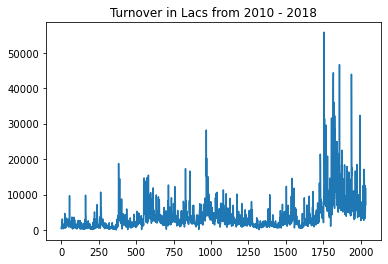

In [11]:
plt.plot(df1)
plt.title('Turnover in Lacs from 2010 - 2018')
plt.show()

<p style = "font-size:16px"><b>INFERENCE:</b></p>

LSTM are sensitive to the scale of the data. Hence, we will be applying MinMax scalar

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.01375712]
 [0.00570964]
 [0.00544294]
 ...
 [0.09353452]
 [0.21219178]
 [0.12788156]]


# Splitting the data into Train and Test Datasets:

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(1322, 713)

In [16]:
train_data

array([[0.01375712],
       [0.00570964],
       [0.00544294],
       ...,
       [0.0247873 ],
       [0.0112888 ],
       [0.00163322]])

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating the Stacked LSTM Model and Model Training:

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 14s 383ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 2/100
20/20 [==============================] - 6s 277ms/step - loss: 0.0018 - val_loss: 0.0110
Epoch 3/100
20/20 [==============================] - 5s 269ms/step - loss: 0.0017 - val_loss: 0.0104
Epoch 4/100
20/20 [==============================] - 6s 293ms/step - loss: 0.0017 - val_loss: 0.0097
Epoch 5/100
20/20 [==============================] - 6s 303ms/step - loss: 0.0016 - val_loss: 0.0096
Epoch 6/100
20/20 [==============================] - 5s 270ms/step - loss: 0.0016 - val_loss: 0.0098
Epoch 7/100
20/20 [==============================] - 5s 262ms/step - loss: 0.0016 - val_loss: 0.0099
Epoch 8/100
20/20 [==============================] - 5s 261ms/step - loss: 0.0016 - val_loss: 0.0097
Epoch 9/100
20/20 [==============================] - 5s 263ms/step - loss: 0.0016 - val_loss: 0.0098
Epoch 10/100
20/20 [==============================] - 5s 263ms/step - loss: 0.0016 - val_l

# Prediction:

In [24]:
# checking the tensor flow version

tf.__version__

'2.6.0'

In [25]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3361.7797811360815

In [28]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

6914.395964633059

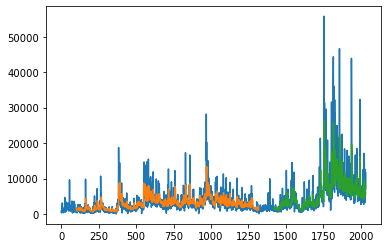

In [29]:
# Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

713

In [31]:
x_input=test_data[613:].reshape(1,-1)  # TAKING 100 days Previous data as input
x_input.shape

(1, 100)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
temp_input

[0.08905248641194126,
 0.0946544422596344,
 0.07394606845466926,
 0.10137075891398908,
 0.7874708083773228,
 0.41346824116569786,
 0.2738579820826433,
 0.314738637611804,
 0.14477555204741588,
 0.13865652847802973,
 0.14065480408140704,
 0.19184917488124134,
 0.1317921448780323,
 0.09488919567163526,
 0.12250448867189155,
 0.10350094870530262,
 0.19454848016907988,
 0.16516338334945022,
 0.1235407778163051,
 0.0838058912337907,
 0.19730629433483302,
 0.09640217064347562,
 0.07247598802829389,
 0.05220212340563308,
 0.1693035146247068,
 0.05693595826414569,
 0.05877503946657133,
 0.1800185361868436,
 0.15393560146767546,
 0.07497033276834576,
 0.2979855357438991,
 0.15646889230130853,
 0.13944065512713655,
 0.11496581717519137,
 0.09919193137447045,
 0.10498520766344258,
 0.1053161597213398,
 0.21322465757948414,
 0.09838788299085897,
 0.1741601104417887,
 0.3310663835267716,
 0.17880707935885756,
 0.11525836156476431,
 0.09703302556945649,
 0.11003725184877286,
 0.06273713145688542,
 0

In [44]:
# Predicting Output - i.e Turnover in Lacs for next 30 days considering previous 100 days data values.

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("\n {} day input \n {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("\n {} day output \n {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


 0 day input 
 [0.19527428 0.57949849 0.23854895 0.14100065 0.10847169 0.08328613
 0.07660625 0.04737406 0.08472014 0.08141941 0.07938039 0.10893725
 0.12291315 0.07367075 0.14186357 0.06506546 0.07631837 0.08350796
 0.09933461 0.05820898 0.0803964  0.14135763 0.22436809 0.14585545
 0.11913359 0.06855374 0.04856237 0.30678125 0.13817374 0.17884638
 0.26468016 0.13296178 0.10995828 0.05681715 0.225287   0.14290722
 0.09811652 0.09353452 0.21219178 0.12788156 0.1268279  0.12096855
 0.11650133 0.11278872 0.10964762 0.10696711 0.10465465 0.10262609
 0.10080726 0.09913731 0.09756967 0.09607185 0.09462337 0.09321339
 0.09183799 0.09049767 0.08919549 0.08793519 0.08672039 0.08555378
 0.08443691 0.08337004 0.08235247 0.08138256 0.08045802 0.07957633
 0.0787347  0.07793042 0.07716091 0.07642382 0.07571703 0.07503867
 0.07438709 0.07376085 0.07315873 0.07257958 0.07202239 0.07148625
 0.07097025 0.07047361 0.06999553 0.06953526 0.06909204 0.06866519
 0.06825402 0.06785791 0.06747618 0.06710828 0

 [[0.06194212]]

 8 day input 
 [0.08472014 0.08141941 0.07938039 0.10893725 0.12291315 0.07367075
 0.14186357 0.06506546 0.07631837 0.08350796 0.09933461 0.05820898
 0.0803964  0.14135763 0.22436809 0.14585545 0.11913359 0.06855374
 0.04856237 0.30678125 0.13817374 0.17884638 0.26468016 0.13296178
 0.10995828 0.05681715 0.225287   0.14290722 0.09811652 0.09353452
 0.21219178 0.12788156 0.1268279  0.12096855 0.11650133 0.11278872
 0.10964762 0.10696711 0.10465465 0.10262609 0.10080726 0.09913731
 0.09756967 0.09607185 0.09462337 0.09321339 0.09183799 0.09049767
 0.08919549 0.08793519 0.08672039 0.08555378 0.08443691 0.08337004
 0.08235247 0.08138256 0.08045802 0.07957633 0.0787347  0.07793042
 0.07716091 0.07642382 0.07571703 0.07503867 0.07438709 0.07376085
 0.07315873 0.07257958 0.07202239 0.07148625 0.07097025 0.07047361
 0.06999553 0.06953526 0.06909204 0.06866519 0.06825402 0.06785791
 0.06747618 0.06710828 0.06675361 0.06641164 0.06608185 0.06576375
 0.06545688 0.06516077 0.06487


 18 day output 
 [[0.06029854]]

 19 day input 
 [0.05820898 0.0803964  0.14135763 0.22436809 0.14585545 0.11913359
 0.06855374 0.04856237 0.30678125 0.13817374 0.17884638 0.26468016
 0.13296178 0.10995828 0.05681715 0.225287   0.14290722 0.09811652
 0.09353452 0.21219178 0.12788156 0.1268279  0.12096855 0.11650133
 0.11278872 0.10964762 0.10696711 0.10465465 0.10262609 0.10080726
 0.09913731 0.09756967 0.09607185 0.09462337 0.09321339 0.09183799
 0.09049767 0.08919549 0.08793519 0.08672039 0.08555378 0.08443691
 0.08337004 0.08235247 0.08138256 0.08045802 0.07957633 0.0787347
 0.07793042 0.07716091 0.07642382 0.07571703 0.07503867 0.07438709
 0.07376085 0.07315873 0.07257958 0.07202239 0.07148625 0.07097025
 0.07047361 0.06999553 0.06953526 0.06909204 0.06866519 0.06825402
 0.06785791 0.06747618 0.06710828 0.06675361 0.06641164 0.06608185
 0.06576375 0.06545688 0.06516077 0.06487502 0.06459923 0.06433301
 0.06407599 0.06382782 0.06358817 0.06335673 0.06313318 0.06291723
 0.0627086  0


 26 day output 
 [[0.05942959]]

 27 day input 
 [0.30678125 0.13817374 0.17884638 0.26468016 0.13296178 0.10995828
 0.05681715 0.225287   0.14290722 0.09811652 0.09353452 0.21219178
 0.12788156 0.1268279  0.12096855 0.11650133 0.11278872 0.10964762
 0.10696711 0.10465465 0.10262609 0.10080726 0.09913731 0.09756967
 0.09607185 0.09462337 0.09321339 0.09183799 0.09049767 0.08919549
 0.08793519 0.08672039 0.08555378 0.08443691 0.08337004 0.08235247
 0.08138256 0.08045802 0.07957633 0.0787347  0.07793042 0.07716091
 0.07642382 0.07571703 0.07503867 0.07438709 0.07376085 0.07315873
 0.07257958 0.07202239 0.07148625 0.07097025 0.07047361 0.06999553
 0.06953526 0.06909204 0.06866519 0.06825402 0.06785791 0.06747618
 0.06710828 0.06675361 0.06641164 0.06608185 0.06576375 0.06545688
 0.06516077 0.06487502 0.06459923 0.06433301 0.06407599 0.06382782
 0.06358817 0.06335673 0.06313318 0.06291723 0.0627086  0.06250703
 0.06231226 0.06212403 0.06194212 0.06176628 0.06159631 0.06143199
 0.06127312 

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [36]:
len(df1)

2035

# Plotting:

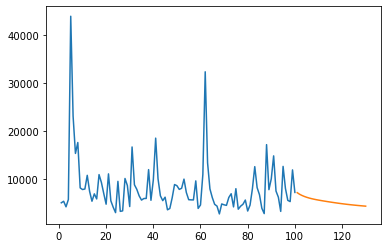

In [38]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

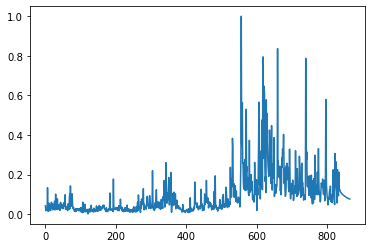

In [41]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])
plt.show()

In [40]:
df3=scaler.inverse_transform(df3).tolist()

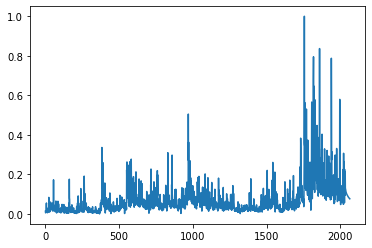

In [42]:
plt.plot(df3)
plt.show()

<p style = "font-size:18px"><centre><b> THANK YOU </b></centre></p>